# Correction matrix for the gradient
- Version: 0.1
- Last update: 2023.11.16
- Author: Yu-Le Wu

**Disclaimer: this script is not finished yet. So far it outputs channel-wise gradient estimates, not yet the correction matrix.**

It is still useful for checking the gradient in your own dataset. More FOVs improve the estimate precision.

## 1. Import requried packages
This part can take a while (a few minutes)

In [2]:
import tifffile
import os
import cv2
import numpy as np
import pandas as pd
import seaborn_image as isns
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage import exposure
import skimage
import seaborn as sns
from skimage.morphology import disk
from skimage.filters import median

## 2. Specify basic information
### 2.1. Specify the working directory
The base_dir should be the one where the folder image_data is

In [3]:
base_dir = "/Users/teresaglauner/Documents/Hamburg_folder"        # where the project folder is
project_name = "CRC_TMA"    # the name of the project folder

In [4]:
os. chdir(base_dir)
imageData_dir = os.path.join(base_dir, project_name, "image_data")
FOVs = os.listdir(imageData_dir)

FOVs = [item for item in FOVs if os.path.isdir(os.path.join(imageData_dir, item))]
FOVs = sorted(FOVs)

gradient_correction_dir = os.path.join(base_dir, project_name, "gradient_correction")
if not os.path.exists(gradient_correction_dir):
    os.mkdir(gradient_correction_dir)

### 2.2. Specify the channels
Here we should use the markers that are expressed in most of the cells, or we can say these markers have continuous distributions. In our cases, they are mostly the metabolic markers.

In [5]:
channels = ['ARG1', 'ASCT2', 'ATP5A', 'CA9', 'CD14','CD163', 'STING1',
       'CD20', 'CD3e', 'CD31', 'CD4', 'CD45', 'CD68', 'CD7', 'CD8',
       'CD98', 'CPT1A', 'CS', 'DCN', 'GS', 'MPO', 'MSH2', 'MSH6',
       'CytC', 'FoxP3', 'GLS', 'GLUT1', 'HLADRa', 'Ki67',
       'LDH', 'MCT1', 'PDL1', 'PD1', 'PKM2', 'PanCK', 'SMA', 'Vimentin', 'nuclei', 'membrane', 'Au']

## 3. Gradient estimation
Every channel is summed up over all FOVs. The sum is then blurred strongly by applying a Gaussian filtering with large Sigma before applying a median filtering. The highly blurred sum is then the gradient estimate

In [6]:
sigma = 200                        # specify the Gaussian sigma here
diameter_median_filtering = 20     # the diameter of the median filtering
#FOVs = FOVs[0:10]

img_ch = {}
for ch in channels:
    for k, FOV in enumerate(FOVs):
        # Locate the tiff files
        folderPath = os.path.join(imageData_dir, FOV, "rescaled")
        files = os.listdir(folderPath)
        fname = os.path.join(folderPath, ch + '.tiff')
        
        # Read one tiff
        img = skimage.io.imread(fname)
        
        # Sum up all tiff files from the channel over all FOVs
        if k == 0:
            img_sum = img
        else:
            img_sum = img_sum+img
    
    # Strongly blurr the sum
    img_g = skimage.filters.gaussian(img_sum, sigma=sigma)
    
    # Median filtering (this might not be necessary)
    med = median(img_g, disk(diameter_median_filtering))
    
    # Normalize to have the maximum as 1
    med_norm = med/med.max()
    
    # Save the processed image channel-by-channel
    imsave(os.path.join(gradient_correction_dir, ch + '.tiff'), med_norm)
    img_ch[ch] = med_norm

## 4. Visualization and export
### 4.1 Display all specified channels as a gallery

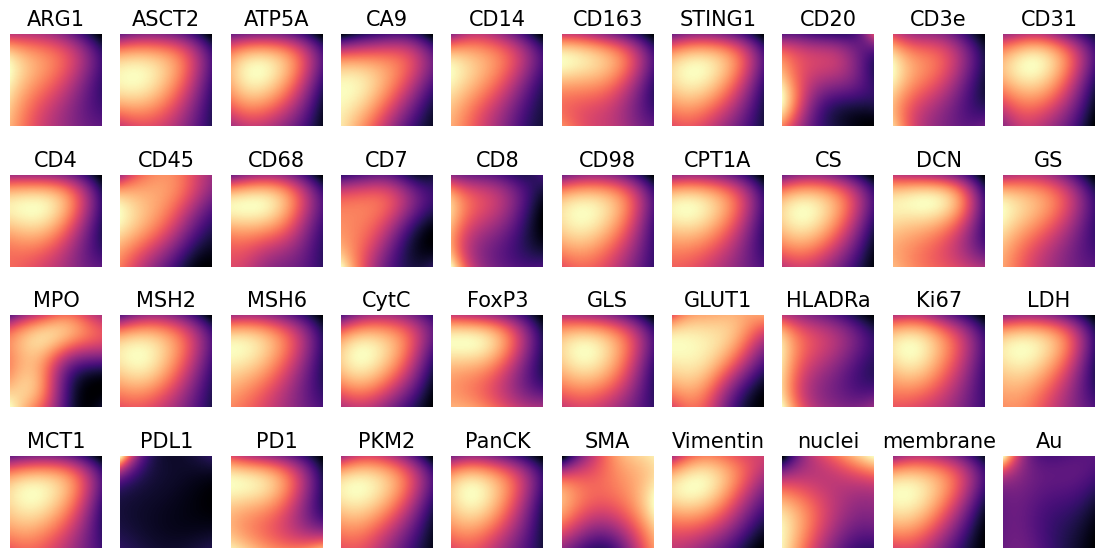

In [8]:
fig, axes = plt.subplots(4, 10, figsize=(14, 7), sharey=True)
axes = axes.flatten()
magma = sns.color_palette("magma", as_cmap=True)

for ax in axes:
    ax.grid(False)
    ax.axis('off')
    
for k, key in enumerate(img_ch):
    ax = axes[k]
    ax.imshow(img_ch[key], cmap=magma)
    ax.title.set_text(channels[k])

In [19]:
FOVs

['A1a',
 'A1c',
 'A1d',
 'A1e',
 'A1f',
 'A1g',
 'A1h',
 'A1i',
 'A1k',
 'A1l',
 'A1m',
 'A1n',
 'A1o',
 'A1p',
 'A1q',
 'A1r',
 'A2a',
 'A2b',
 'A2c',
 'A2d',
 'A2e',
 'A2g',
 'A2h',
 'A2i',
 'A2k',
 'A2l',
 'A2m',
 'A2n',
 'A2o',
 'A2p',
 'A2q',
 'A2r',
 'A3a',
 'A3b',
 'A3c',
 'A3d',
 'A3e',
 'A3f',
 'A3g',
 'A3h',
 'A3i',
 'A3l',
 'A3m',
 'A3n',
 'A3o',
 'A3p',
 'A3q',
 'A3r',
 'A4a',
 'A4b',
 'A4c',
 'A4d',
 'A4e',
 'A4f',
 'A4g',
 'A4h',
 'A4i',
 'A4k',
 'A4l',
 'A4m',
 'A4n',
 'A4o',
 'A4p',
 'A4q',
 'A4r',
 'A5a',
 'A5b',
 'A5c',
 'A5d',
 'A5e',
 'A5f',
 'A5g',
 'A5h',
 'A5i',
 'A5k',
 'A5l',
 'A5m',
 'A5n',
 'A5o',
 'A5p',
 'A5q',
 'A5r',
 'A6a',
 'A6b',
 'A6c',
 'A6d',
 'A6e',
 'A6g',
 'A6h',
 'A6i',
 'A6k',
 'A6l',
 'A6m',
 'A6n',
 'A6o',
 'A6p',
 'A6q',
 'A6r',
 'A7a',
 'A7b',
 'A7c',
 'A7d',
 'A7f',
 'A7g',
 'A7h',
 'A7i',
 'A7k',
 'A7l',
 'A7m',
 'A7n',
 'A7o',
 'A7p',
 'A7q',
 'A7r',
 'A8a',
 'A8b',
 'A8c',
 'A8d',
 'A8e',
 'A8f',
 'A8g',
 'A8h',
 'A8i',
 'A8l',
 'A8m',


### 4.2 Export the gallery

In [9]:
fig.savefig(os.path.join(gradient_correction_dir, 'gradient_metabolic_markers.png'), dpi=600)